<a href="https://colab.research.google.com/github/Mahe077/openCV/blob/main/numPlateRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import cv2 # this is opencv module
import glob
import os
import imutils
import numpy as np

In [38]:
img = cv2.imread('/content/drive/MyDrive/CG/Images/4.jpg',cv2.IMREAD_COLOR)

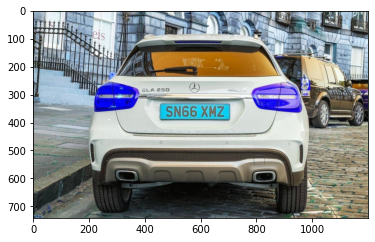

In [39]:
plt.imshow(img)

In [40]:
img = cv2.resize(img, (600,400) )

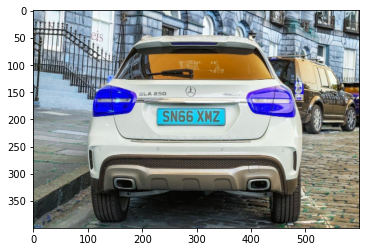

In [41]:
plt.imshow(img)

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #convert to grey scale

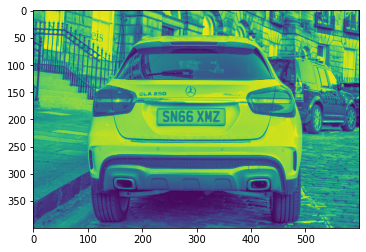

In [43]:
plt.imshow(gray)

In [44]:
gray = cv2.bilateralFilter(gray, 13, 15, 15)

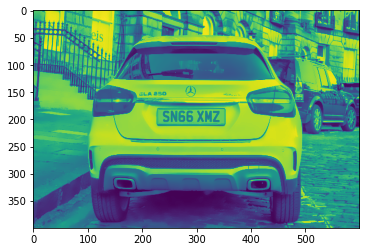

In [45]:
plt.imshow(gray)

In [46]:
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection

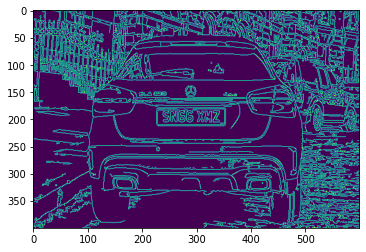

In [53]:
plt.imshow(edged)

In [48]:
contours=cv2.findContours(edged.copy(),cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

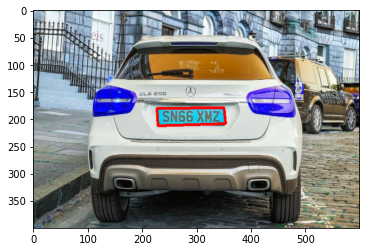

In [61]:
for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
   contourDetected =  cv2.drawContours(img, [screenCnt], -1, (255, 0, 0), 3)
   plt.imshow(contourDetected)

In [62]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

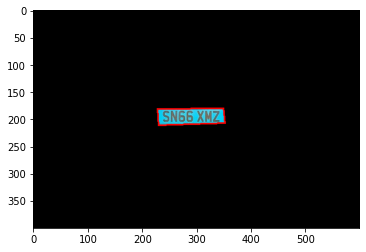

In [63]:
plt.imshow(new_image)